# My Introduction to Julia

**Felix Chan**

**School of Accounting, Economics and Finance**

**Curtin University**

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numba import jit
plt.rcParams['figure.figsize'] = [12,9]
%matplotlib inline

%load_ext julia.magic

Initializing Julia interpreter. This may take some time...


## What can you expect? 

- What this is not. 
    - A proper introduction to Julia. you have youTube for that, like this [one](https://www.youtube.com/watch?v=4igzy3bGVkQ)! You can also get started [here](https://julialang.org/learning/).
    - A sale pitch. 
    
- What this is. 
    - Some personal experience about learning and using Julia.
    - Myth busting?
    
- What you will see 
    - Some Julia code in action. 
    - Some useful (to me) features about Julia.
    - Some evaluations on what others have said about Julia. 
    - My ignorant. 

## About me

### Who am I? 

![me](./pics/myself-memoji.png)

- An econometrician (data scientist for economists and finance people) with a mathematics and computer science background.
- Research Interests: identifying and extracting information from data. 
- Forecasting and prediction: both theory and applications. 


### What do I do and what do I require from my computer? 

- Economic/econometric modelling 
- simulation of (complex) models
- estimation from simulated and "real" data
- prediction 
- visualisation 
- Other stuff: web scraping, small utility (software) e.g. TV guide and timer to activate download. 

## Why one should keep learning? 

- Curiosity and fun.
- Your collaborators and (company) don't always use the same thing as you! 
- Don't always have access to the software. 
- Different languages solve different problems. 
- World is rapidly changing and the future is highly uncertain.  

### Multilingual 

*"Honesty compels us to point out that in the 20-year history of Numerical Recipes, we have **never** been correct in our predictions about the future of programming languages for scientific programming, not once! At various times we convinced ourselves that the wave of the scientific future would be... Fortran ... Pascal... C... Fortran 90 (or 95 or 2000) .. Mathematica ...Matlab ... C++ or Java.... [...] None, however, currently command a majority, or even a large plurality, of scientific users."*

--*Numerical Recipes, Third Edition, Page 1*

## Who is Julia?

*We want a language that's open source, with a liberal license. We want the speed of C with the dynamism of Ruby. We want a language that's homoiconic, with true macros like Lisp, but with obvious, familiar mathematical notation like Matlab. We want something as usable for general programming as Python, as easy for statistics as R, as natural for string processing as Perl, as powerful for linear algebra as Matlab, as good at gluing programs together as the shell. Something that is dirt simple to learn, yet keeps the most serious hackers happy. We want it interactive and we want it compiled.*

*(Did we mention it should be as fast as C?)*

-- [*Why we created Julia*](https://julialang.org/blog/2012/02/why-we-created-julia/) Jeff Bezanson, Stefan Karpinski, Viral B. Shah and Alan Edelman | 14 February 2012 

## Julia is a generalist

- Perhaps one of the most common misconceptions. 
- Julia is not just for computation. Julia is general purpose. 
- Two examples. *HelloWorld, Hello You* and *Generating PDF Through $\LaTeX{}$*.


## Example 1: Hello World, Hello You

- Classical Hello World. 
- Print a string. 
- Hello Word, Hello You. Print a string, ask a question and take the input and return another string. 
- See *helloworld.jl*. 

## Example 2: Generating PDF Through $\LaTeX{}$

- Want a function that takes a set of data of unknown number of variables. Calculate their means and put them into a $\LaTeX{}$ source. Compile the source and produce a PDF document. 
- This is not a great example as far as application goes because of other technologies such as [PythonTeX](https://ctan.org/pkg/pythontex?lang=en). 
- For a more useful (and complex) application, see [here](https://www.youtube.com/watch?v=uLhXgt_gKJc&t=2518s).
- It does highlight a few features of Julia as a general purpose language. 

In [2]:
%%julia
using DataFrames, CSV, Printf, Dates
function getMean(filename::String)::Array{Float64,2} 
    df = DataFrame(CSV.File(filename, header=1))
    ddf = describe(df)
#    mdf = convert(Array{Float64,2}, select(ddf, :mean)) #convert no longer able to convert dataframe to matrix. 
    mdf = Matrix(select(ddf, :mean))
    return mdf
end


<PyCall.jlwrap getMean>

In [3]:
%%julia

function generateLaTeX(author::String, data::Array{Float64, 2}, filename::String)
    n = size(data)[1]
    datatext = [@sprintf "%.4f" i for i in data]
    meantext = join(datatext, ", ", " and ") 
    s = """
	\\documentclass[a4paper, 12pt]{article}
	\\usepackage{amsmath, amsfonts, amssymb}
	\\author{$author}
	\\title{Getting Some Means}
	\\date{\\today}
	\\begin{document}
	\\maketitle
	\\section{Mean Report}
		    There are $n variables in the dataset and the means are $meantext, respectively. The mean is calculated based on 
		    \\begin{equation*}
			    \\bar{x} = N^{-1} \\sum^N_{i=1} x_i
			\\end{equation*} 
	\\end{document}
	"""
    
    open(filename,"w") do f
	write(f, s)
    end
    command = `pdflatex $filename`
    pdfname = split(filename, ".")[1]*".pdf"
    opencommand = `open $pdfname`
    run(command)
    run(opencommand)
    
end


<PyCall.jlwrap generateLaTeX>

In [34]:
%%julia
mdf = getMean("./data/rand.csv")
author = "Felix Chan"
fname = "temp-"*Dates.format(Dates.now(), "yyyy-mm-ddTHH-MM-SS")*".tex"
generateLaTeX(author, mdf, fname)

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/MacPorts 2020.54632_3) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./temp-2021-06-30T13-30-01.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
(/opt/local/share/texmf-texlive/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/opt/local/share/texmf-texlive/tex/latex/base/size12.clo))
(/opt/local/share/texmf-texlive/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/opt/local/share/texmf-texlive/tex/latex/amsmath/amstext.sty
(/opt/local/share/texmf-texlive/tex/latex/amsmath/amsgen.sty))
(/opt/local/share/texmf-texlive/tex/latex/amsmath/amsbsy.sty)
(/opt/local/share/texmf-texlive/tex/latex/amsmath/amsopn.sty))
(/opt/local/share/texmf-texlive/tex/latex/amsfonts/amsfonts.sty)
(/opt/local/share/texmf-texlive/tex/latex/amsfonts/amssymb.sty)
(/opt/local/share/texmf-texlive/tex/latex/l

In [35]:
%%julia
mdf = getMean("./data/rand3.csv")
author = "Someone Smarter"
fname = "temp3-"* Dates.format(Dates.now(), "yyyy-mm-ddTHH-MM-SS")*".tex"
generateLaTeX(author, mdf, fname)

This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020/MacPorts 2020.54632_3) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
(./temp3-2021-06-30T13-30-52.tex
LaTeX2e <2020-02-02> patch level 5
L3 programming layer <2020-03-06>
(/opt/local/share/texmf-texlive/tex/latex/base/article.cls
Document Class: article 2019/12/20 v1.4l Standard LaTeX document class
(/opt/local/share/texmf-texlive/tex/latex/base/size12.clo))
(/opt/local/share/texmf-texlive/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/opt/local/share/texmf-texlive/tex/latex/amsmath/amstext.sty
(/opt/local/share/texmf-texlive/tex/latex/amsmath/amsgen.sty))
(/opt/local/share/texmf-texlive/tex/latex/amsmath/amsbsy.sty)
(/opt/local/share/texmf-texlive/tex/latex/amsmath/amsopn.sty))
(/opt/local/share/texmf-texlive/tex/latex/amsfonts/amsfonts.sty)
(/opt/local/share/texmf-texlive/tex/latex/amsfonts/amssymb.sty)
(/opt/local/share/texmf-texlive/tex/latex/

## Julia is Fast

- The claim here is that Julia is FAST - as in C fast (well almost). Part of the [PetaFLOPS](https://www.avenga.com/magazine/julia-programming-language/) club. 
- To test this, I use my first toy algorithm. The logistic map

$$
                  x_{t+1} = Ax_t (1-x_t) 
$$

$$
     x_0 \Rightarrow Ax_0(1-x_0) \rightarrow x_1 \Rightarrow Ax_1(1-x_1) \rightarrow x_2 \Rightarrow x_2\Rightarrow Ax_2(1-x_2) \rightarrow x_3 \Rightarrow \ldots Ax_{T-1}(1-x_{T-1}) \rightarrow x_T 
$$

- Convergence: do different starting values, $x_0$ give different $x_T$ values when $T$ is large?
- What role does $A$ play in this? 
- The idea here is to run the logistic map with $T$ iterations, say 5000, with different starting values, $x_0$ and different $A$ values. 
- We know $A \in (0,4]$ and $x_0 \in (0,1)$. 

![logistic](./pics/logistic.png)

![logistic_ani](./pics/logistic_title_2021-06-22.gif)

0. Initiate an empty array $y$ with size 39501
1. Set $T=5000$, $tol=1e-6$, $i=0$
2. Carry out the loops below


    for A=0.01 to 3.99 by 0.01 
        for x_0=0.01 to 0.99 by 0.01
            for t = 1 to T by 1, compute 

$$x_t = Ax_{t-1}(1-x_{t-1})$$

if $|x_t-x_{t-1}|<tol$ then set $y[i] = x_{t-1}$, $i=i+1$ exit the inner $t$ loop.

if $T$ is 5000 set $y[i]=x_T$, $i=i+1$ and go to the next step. 

- Number of calculations: minimum $79200$, maximum $1.98\times 10^8$
    

In [6]:
def diff_eq_limit(N,A,y0,tol_level=1e-6):
    """
    Suppressed. See *logistic.py* for the docstring. 
    """
    y = np.zeros(N)
    y[0] = y0
    t=1
    tol=0
    while (tol==0)&(t<N):
        y[t] = A*y[t-1]*(1-y[t-1])
        if abs(y[t]-y[t-1])< tol_level:
            tol = 1
        else:
            t=t+1
    return y[t-1]

In [7]:
%%julia
 """
   Supressed. See *logistic.jl* for docstring. 
"""
function diff_eq_limit(N::Int64, A::Float64, y0::Float64; tol_level::Float64=1e-6)::Float64
    y = zeros(N)
    y[1] = y0
    t=2
    tol=0
    while (tol==0)&(t<N)
        y[t] = A*y[t-1]*(1-y[t-1])
        if abs(y[t]-y[t-1])<tol_level
            tol = 1
        else
            t=t+1
        end
    end
    return y[t-1]
end 



<PyCall.jlwrap diff_eq_limit>

In [8]:
def getbf(Aset, y0set, N, tol_level=1e-6):
    """
    supressed. 
    """
    ly = y0set.shape[0]
    lA = Aset.shape[0]
    bfset = np.zeros(ly*lA)
    for i,A in enumerate(Aset):
        for j,y0 in enumerate(y0set):
            k = i*ly+j
            temp = diff_eq_limit(N,A,y0)
            bfset[k] = temp
    return bfset 

In [9]:
%%julia
"""
    Supressed. See *logistic.jl* for docstring. 
"""
function getbf(Aset::Array{Float64}, y0set::Array{Float64}, N::Int64; tol_level::Float64=1e-6)::Array{Float64}
    ly, = size(y0set) 
    la, = size(Aset)
    bfset = ones(ly*la) 
    for (i,A) in enumerate(Aset)
            for (j,y0) in enumerate(y0set)
                k = (i-1)*ly+j
                temp = diff_eq_limit(N,A,y0;tol_level=tol_level)
                bfset[k] = temp
            end
    end
    return bfset
end



<PyCall.jlwrap getbf>

In [10]:
N = 5000
y0set, Aset = np.arange(0.01,1,0.01), np.arange(0.01,4,0.01)

In [11]:
%%julia
N = 5000
y0set, Aset = collect(range(0.01,stop=0.99,step=0.01)), collect(range(0.01,stop=3.99,step=0.01));

In [12]:
%%time
bfPython = getbf(Aset, y0set, N)

CPU times: user 1min 16s, sys: 401 ms, total: 1min 17s
Wall time: 1min 17s


In [13]:
%%julia
@time bfJulia = getbf(Aset, y0set, N);

  0.739959 seconds (170.84 k allocations: 1.479 GiB, 7.56% gc time)

## Not a fair fight

- The comparison is informative but not necessary fair. 
- We can turn Python into JIT by using [numba](http://numba.pydata.org/).

In [14]:
@jit(nopython=True)
def getbf_numba(Aset, y0set, N, tol_level=1e-6):
    ly = y0set.shape[0]
    lA = Aset.shape[0]
    bfset = np.zeros(ly*lA)
    for i,A in enumerate(Aset):
        for j,y0 in enumerate(y0set):
            k = i*ly+j
            y = np.zeros(N)
            y[0] = y0
            t=1
            tol=0
            while (tol==0)&(t<N):
                y[t] = A*y[t-1]*(1-y[t-1])
                if abs(y[t]-y[t-1])< tol_level:
                    tol = 1
                else:
                    t=t+1
            bfset[k] = y[t-1]
    return bfset 

In [15]:
%%time 
bfPython_numba = getbf_numba(Aset, y0set, N)

CPU times: user 889 ms, sys: 73.3 ms, total: 962 ms
Wall time: 1.64 s


- Julia still seems to have the edge. 
- Installation of numba can be painful depends on the system configurations (mostly to do with the choice of compiler). 
- The other alternative is to use [Cython](https://cython.org/) but that can be a little more involved coding wise. 
- Main takeaway: Python is not necessarily slower but Julia gives **much easier access** to speed. 

## Julia is built for Parallelisation 

- We can push the speed limit further by using multi-threads. 
- See if you can spot the different between the "parallelised" code in the next slide and our previous code. 

In [16]:
%%julia
function getbf_parallel(Aset::Array{Float64}, y0set::Array{Float64}, N::Int64; tol_level::Float64=1e-6)::Array{Float64}
    ly, = size(y0set) 
    la, = size(Aset)
    bfset = ones(ly*la) 
    Threads.@threads for i in 1:la
                        A = Aset[i]
                        for j in 1:ly
                            y0 = y0set[j]
                            k = (i-1)*ly+j
                            temp = diff_eq_limit(N,A,y0;tol_level=tol_level)
                            bfset[k] = temp
                        end
    end
    return bfset
end


<PyCall.jlwrap getbf_parallel>

In [17]:
%%julia 
@time bfJuliaP = getbf_parallel(Aset, y0set, N);


  0.616420 seconds (252.13 k allocations: 1.484 GiB, 8.17% gc time)

## Two Languages Problem

- One for prototyping (Python), one for production (C/C++)
- One for front-end (Python/R), one for critical computation (C/C++)
- Julia modules are written in Julia
- One catch: First run tends to be slow (including compilation time). 


## Julia is composable

- Multiple dispatch. 
- OOP design is similar to R. 
- Function can perform different tasks based on input types. 
- We can redefine the multiplication operator.
- Operator is itself a function in Julia. (LISP?) 

In [18]:
%%julia 
4*3 == *(4,3)

True

## Example: Dual Number

Consider a pair of dual numbers $(x_1, x_2)$ and $(y_1, y_2)$ and define the addition and multiplication between these numbers as


\begin{align*}
    (x_1,x_2) + (y_1,y_2) =& (x_1+y_1, x_2 + y_2) \\ 
    (x_1,x_2) \times (y_1,y_2) =& (x_1y_1, x_1y_2 + x_2y_1) 
\end{align*}
 

**Note:** The construction of dual number facilitates [*auto-diff*](https://en.wikipedia.org/wiki/Automatic_differentiation), a method of calculating derivatives. To see this, consider the case when the first number represents the value of a function at a particular point and the second number represents the value of its derivative at the same point then 

$$ (x,x')\times (y,y') = (xy, xy' + x'y) $$

gives the product rule!!

In [19]:
%%julia
struct dual
    fvalue::Float64
    dvalue::Float64
end

In [20]:
%%julia 
import Base.*, Base.+

function +(x::dual, y::dual)::dual
    z1 = x.fvalue+y.fvalue
    z2 = x.dvalue+y.dvalue 
    return dual(z1, z2)
end

function *(x::dual, y::dual)::dual
    z1 = x.fvalue*y.fvalue
    z2 = x.dvalue*y.fvalue + x.fvalue*y.dvalue
    return dual(z1, z2)
end

<PyCall.jlwrap *>

In [21]:
%%julia
x = dual(2.0,3.0)
y = dual(1.0,-1.0)
zsum, zproduct = x+y, x*y
(zsum.fvalue, zsum.dvalue, zproduct.fvalue, zproduct.dvalue)

(3.0, 2.0, 2.0, 1.0)

## To type or not to type? 

- Flexibility to "type" not only facilitates speed but also multiple dispatch. 
- Function can be defined differently based on different input types. 
- This is not dissimilar to R. 
- Recall R function such as *plot* (data vs lm object) and *predict* (lm vs. glm). 
- Is this possible in Python? 

- Of course it is... there is an app (a module) for this! See *multipledispatch* [here.](https://pypi.org/project/multipledispatch/)
- Released in 2018!!! 
- Economist: Advantage of perfect competition. Everybody gets better?!

## Modules

- Eco systems of Python and R are **MASSIVE**. 
- Julia is lagging behind naturally but it is expanding. See [here](https://julialang.org/packages/) and [here](https://juliahub.com/lp/)
- Reinventing the wheel vs. Foreign Language Interface. 
- Substitute vs. complement 

## Complement

- [PyCall.jl](https://github.com/JuliaPy/PyCall.jl). Calling Python from within Julia. 
- [PyJulia](https://pyjulia.readthedocs.io/en/latest/usage.html). Call Julia from within Python. 
- [Rcall](https://juliainterop.github.io/RCall.jl/stable/). Not dissimilar to [Rpy2](https://pypi.org/project/rpy2/).
- Julia magic in Jupyter.
- Strangely, it uses PyCall.jl. 


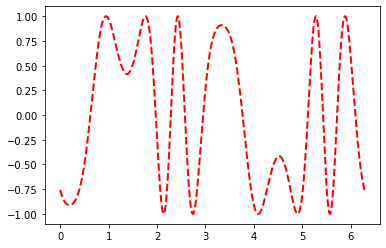

In [22]:
%%julia
using PyCall
plt = pyimport("matplotlib.pyplot")
x = range(0;stop=2*pi,length=1000); y = sin.(3*x + 4*cos.(2*x));
plt.plot(x, y, color="red", linewidth=2.0, linestyle="--")
plt.show()


## Substitute

- Applications dependent. 
- Some examples
- [DataFrames.jl](https://dataframes.juliadata.org/stable/)


In [23]:
%%julia 
using CSV, DataFrames
const df = DataFrames
movie = df.DataFrame(CSV.File("./data/MovieFinances.csv", header=1))
df.describe(movie)

<PyCall.jlwrap 7×8 DataFrame
│ Row │ variable       │ mean    │ min     │ median  │ max            │ nunique │ nmissing │ eltype   │
│     │ Symbol         │ Union…  │ Any     │ Union…  │ Any            │ Union…  │ Nothing  │ DataType │
├─────┼────────────────┼─────────┼─────────┼─────────┼────────────────┼─────────┼──────────┼──────────┤
│ 1   │ Movie          │         │ #Horror │         │ �� L'IntǸrieur │ 5153    │          │ String   │
│ 2   │ Month          │         │ Apr     │         │ Sep            │ 12      │          │ String   │
│ 3   │ Day            │ 16.3265 │ 1       │ 17.0    │ 31             │         │          │ Int64    │
│ 4   │ Release Year   │ 2002.84 │ 1915    │ 2006.0  │ 2016           │         │          │ Int64    │
│ 5   │ Budget         │ 30.6941 │ 0.0011  │ 17.0    │ 425.0          │         │          │ Float64  │
│ 6   │ DomesticGross  │ 40.8318 │ 0.0     │ 17.1421 │ 936.662        │         │          │ Float64  │
│ 7   │ WorldwideGross │ 87.1038 │ 

In [24]:
import pandas as pd
movie = pd.read_csv("./data/MovieFinances.csv", header=0)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5219 entries, 0 to 5218
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Movie           5219 non-null   object 
 1   Month           5219 non-null   object 
 2   Day             5219 non-null   int64  
 3   Release Year    5219 non-null   int64  
 4   Budget          5219 non-null   float64
 5   DomesticGross   5219 non-null   float64
 6   WorldwideGross  5219 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 285.5+ KB


In [25]:
%%julia
df.first(movie, 5)

<PyCall.jlwrap 5×7 DataFrame
│ Row │ Movie                                    │ Month  │ Day   │ Release Year │ Budget  │ DomesticGross │ WorldwideGross │
│     │ String                                   │ String │ Int64 │ Int64        │ Float64 │ Float64       │ Float64        │
├─────┼──────────────────────────────────────────┼────────┼───────┼──────────────┼─────────┼───────────────┼────────────────┤
│ 1   │ Avatar                                   │ Dec    │ 18    │ 2009         │ 425.0   │ 760.508       │ 2783.92        │
│ 2   │ Star Wars Ep. VII: The Force Awakens     │ Dec    │ 18    │ 2015         │ 306.0   │ 936.662       │ 2058.66        │
│ 3   │ Pirates of the Caribbean: At World's End │ May    │ 24    │ 2007         │ 300.0   │ 309.42        │ 963.42         │
│ 4   │ Spectre                                  │ Nov    │ 6     │ 2015         │ 300.0   │ 200.074       │ 879.621        │
│ 5   │ The Dark Knight Rises                    │ Jul    │ 20    │ 2012         │ 275.0 

In [26]:
movie.head(5)

Movie Month  Day  Release Year  Budget  \
0                                    Avatar   Dec   18          2009   425.0   
1      Star Wars Ep. VII: The Force Awakens   Dec   18          2015   306.0   
2  Pirates of the Caribbean: At World's End   May   24          2007   300.0   
3                                   Spectre   Nov    6          2015   300.0   
4                     The Dark Knight Rises   Jul   20          2012   275.0   

   DomesticGross  WorldwideGross  
0     760.507625     2783.918982  
1     936.662225     2058.662225  
2     309.420425      963.420425  
3     200.074175      879.620923  
4     448.139099     1084.439099

## Data Manipulation

Let's say we want to calculate the ratio between Worldwide Gross and Budget

In [27]:
movie['gross2budget'] = movie['WorldwideGross']/movie['Budget']
%julia transform!(movie, [:"Budget", :"WorldwideGross"]=>((x,y)-> y./x) => :gross2budget);

In [28]:
movie.loc[0:5, ['Movie', 'Budget', 'WorldwideGross', 'gross2budget']]

Movie  Budget  WorldwideGross  \
0                                    Avatar   425.0     2783.918982   
1      Star Wars Ep. VII: The Force Awakens   306.0     2058.662225   
2  Pirates of the Caribbean: At World's End   300.0      963.420425   
3                                   Spectre   300.0      879.620923   
4                     The Dark Knight Rises   275.0     1084.439099   
5                           The Lone Ranger   275.0      260.002115   

   gross2budget  
0      6.550398  
1      6.727654  
2      3.211401  
3      2.932070  
4      3.943415  
5      0.945462

In [29]:
%%julia
movie[1:5, [:Movie, :Budget,:WorldwideGross, :gross2budget]]

<PyCall.jlwrap 5×4 DataFrame
│ Row │ Movie                                    │ Budget  │ WorldwideGross │ gross2budget │
│     │ String                                   │ Float64 │ Float64        │ Float64      │
├─────┼──────────────────────────────────────────┼─────────┼────────────────┼──────────────┤
│ 1   │ Avatar                                   │ 425.0   │ 2783.92        │ 6.5504       │
│ 2   │ Star Wars Ep. VII: The Force Awakens     │ 306.0   │ 2058.66        │ 6.72765      │
│ 3   │ Pirates of the Caribbean: At World's End │ 300.0   │ 963.42         │ 3.2114       │
│ 4   │ Spectre                                  │ 300.0   │ 879.621        │ 2.93207      │
│ 5   │ The Dark Knight Rises                    │ 275.0   │ 1084.44        │ 3.94341      │>

In [30]:
%%julia 
using Statistics
MovieByYear = groupby(movie, :"Release Year")
meanByYear = combine(MovieByYear, [:Budget, :DomesticGross, :WorldwideGross].=> (x -> mean(x)).=>[:mean_budget, :mean_domesticgross, :mean_worldwidegross])
first(meanByYear, 5)

<PyCall.jlwrap 5×4 DataFrame
│ Row │ Release Year │ mean_budget │ mean_domesticgross │ mean_worldwidegross │
│     │ Int64        │ Float64     │ Float64            │ Float64             │
├─────┼──────────────┼─────────────┼────────────────────┼─────────────────────┤
│ 1   │ 2009         │ 36.5478     │ 44.9241            │ 103.301             │
│ 2   │ 2015         │ 26.8538     │ 32.7498            │ 83.9758             │
│ 3   │ 2007         │ 32.9141     │ 38.4732            │ 88.0195             │
│ 4   │ 2012         │ 37.0796     │ 46.7826            │ 120.045             │
│ 5   │ 2013         │ 37.4191     │ 45.1165            │ 110.717             │>

In [31]:
%%julia
sort!(meanByYear, :"Release Year")
first(meanByYear, 5)

<PyCall.jlwrap 5×4 DataFrame
│ Row │ Release Year │ mean_budget │ mean_domesticgross │ mean_worldwidegross │
│     │ Int64        │ Float64     │ Float64            │ Float64             │
├─────┼──────────────┼─────────────┼────────────────────┼─────────────────────┤
│ 1   │ 1915         │ 0.11        │ 10.0               │ 11.0                │
│ 2   │ 1916         │ 0.292953    │ 4.0                │ 4.0                 │
│ 3   │ 1920         │ 0.1         │ 3.0                │ 3.0                 │
│ 4   │ 1925         │ 2.0725      │ 10.0               │ 15.5                │
│ 5   │ 1927         │ 2.0         │ 0.0                │ 0.0                 │>

In [32]:
movieByYear = movie.groupby('Release Year')
movieByYear.mean()

Day     Budget  DomesticGross  WorldwideGross  \
Release Year                                                        
1915           8.000000   0.110000      10.000000       11.000000   
1916          14.500000   0.292953       4.000000        4.000000   
1920          17.000000   0.100000       3.000000        3.000000   
1925          15.500000   2.072500      10.000000       15.500000   
1927          12.000000   2.000000       0.000000        0.000000   
...                 ...        ...            ...             ...   
2012          16.960526  37.079584      46.782595      120.045120   
2013          16.646552  37.419125      45.116518      110.717417   
2014          17.016461  31.575751      41.317979      102.988348   
2015          17.685185  26.853841      32.749798       83.975832   
2016          16.035211  49.132606      51.640742      134.505668   

              gross2budget  
Release Year                
1915            100.000000  
1916             20.000000  
1920             30.000000  
1925             46.051805  
1927              0.000000  
...                    ...  
2012              3.824736  
2013              2.912590  
2014              2.774880  
2015              3.187590  
2016              2.778593  

[92 rows x 5 columns]

In [33]:
meanByYear = movieByYear[['Budget', 'DomesticGross', 'WorldwideGross']].agg(np.mean)
meanByYear.head(5)

Budget  DomesticGross  WorldwideGross
Release Year                                         
1915          0.110000           10.0            11.0
1916          0.292953            4.0             4.0
1920          0.100000            3.0             3.0
1925          2.072500           10.0            15.5
1927          2.000000            0.0             0.0

## Some Interesting Articles

1. [10 Reasons why you should learn julia](https://blog.goodaudience.com/10-reasons-why-you-should-learn-julia-d786ac29c6ca)
2. [Julia vs. Python](https://www.infoworld.com/article/3241107/julia-vs-python-which-is-best-for-data-science.html)
3. [Nature's article: Comes for syntax stay for speed](https://www.nature.com/articles/d41586-019-02310-3)
4. [Things to know about Julia programming language](https://www.simplilearn.com/things-to-know-about-julia-programming-language-article)
5. [Why Julia is turning head](https://www.nextplatform.com/2021/03/22/why-julia-is-turning-heads-in-2021/)
6. [What people love and hate about Julia](https://www.zdnet.com/article/julia-programming-language-users-reveal-what-they-love-and-hate-the-most-about-it/)
7. [Speed comparison between numpy-Cython and Julia](https://github.com/kbarbary/website/blob/master/posts/julia-vs-numpy-arrays.rst)

## Some Final Thoughts (so far)

- Julia is becoming part of my workflow. 
- Still going back to Python as required and they do talk to each other (nicely most time). 
- Highly recommend it as a first language. 
- It is still young, so expect a longer period to mature, aka Patience. 
- It does mean if a particular module is mission critical then you may want to wait (but keep an eye out...). 

